In [4]:
#                      Employee Attrition Prediction
#Business Problem: How to retain a diverse group of employees?
#Data Analytics Problem: Predict which employees are more likely to leave.

#We will perform the following steps.
#1.EDA (Exploratory Data Analysis)
#2.Visualization
#3.Prepare Dataset for training (treating outliers, null values, standardization,
#     label encoding, etc)
#4.Create and train model(s)
#5.Make Prediction.
#6.Plot training and testing error
#Note: We performed Steps 4,5,6 for Logistis Regression, KNN, and Random Forest
#NOTE: We are performing Univariate analysis of only the relevant predictors.
#  Hence, we focused on multicollinearity and Correlation with Target first.

# Table of Contents
## Exploratory Data Analysis, Data Pre-processing and Data Visualisation
#### Checking for predictors such as constants and dropping them
#### Checking for null values or junk data for categorical variables
#### Checking for low correlation with output variable, and dropping such columns
#### Checking for multicollinearity of predictors and dropping one in each
####  pair of collinear predictors
#### Centering and scaling of continuous variables (if needed)
#### Missing value and imputation for contiuous variables (if needed)
#### Outlier detection and handling outliers (as needed)
#### Checking for Skewness of Continuous Variables
#### Following Occam's Razor Principle and Perfoming Logistic Regression as a start



import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn  as sns

df = pd.read_csv('/content/sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#Data Pre-processing - Drop unneccesary columns
#'Over 18' will be dropped as we already have 'Age'
#'Employee Number' will be dropped as this is not relevant to the analysis

#'Employee Count' is a constant of 1. So, this will be dropped.
df.EmployeeCount.unique()

array([1])

In [7]:
#Standard Hours is a constant of 80. So, this will be dropped.
df.StandardHours.unique()

array([80])

In [8]:
df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'], axis="columns", inplace=True)

In [9]:
df.dtypes #Columns dropped

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [10]:
#Data Pre-processing - Categorical variable Columns-Check for null values/junk data.
print('Gender', df.Gender.unique())
print('Attrition', df.Attrition.unique())
print('BusinessTravel', df.BusinessTravel.unique())
print('Department', df.Department.unique())
print('EducationField', df.EducationField.unique())
print('JobRole', df.JobRole.unique())
print('MaritalStatus', df.MaritalStatus.unique())
print('OverTime', df.OverTime.unique())

Gender ['Female' 'Male']
Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
OverTime ['Yes' 'No']


In [11]:
#Based on above: No null values. No junk data.

In [13]:
#One Hot Encoding of Categorical Variables
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as ab
import scipy
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder



In [14]:
Input=df
#Encode non-numerical categories, and build a new table
le_Attrition = LabelEncoder()
le_BusinessTravel = LabelEncoder()
le_Department = LabelEncoder()
le_EducationField = LabelEncoder()
le_Gender = LabelEncoder()
le_JobRole = LabelEncoder()
le_MaritalStatus = LabelEncoder()
le_OverTime = LabelEncoder()

Input['Attrition_n']=le_Attrition.fit_transform(Input['Attrition'])
Input['BusinessTravel_n']=le_BusinessTravel.fit_transform(Input['BusinessTravel'])
Input['Department_n']=le_Department.fit_transform(Input['Department'])
Input['EducationField_n']=le_EducationField.fit_transform(Input['EducationField'])
Input['Gender_n']=le_Gender.fit_transform(Input['Gender'])
Input['JobRole_n']=le_JobRole.fit_transform(Input['JobRole'])
Input['MaritalStatus_n']=le_MaritalStatus.fit_transform(Input['MaritalStatus'])
Input['OverTime_n']=le_OverTime.fit_transform(Input['OverTime'])

In [15]:
Input_n = Input.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus','OverTime'], axis='columns')

In [16]:
Input_n.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Attrition_n                 int64
BusinessTravel_n            int64
Department_n                int64
EducationField_n            int64
Gender_n                    int64
JobRole_n                   int64
MaritalStatus_

In [17]:
Input_n.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_n,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,1,2,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,0,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,2,1,4,1,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,0,1,1,1,0,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,0,2,1,3,1,2,1,0


<Axes: >

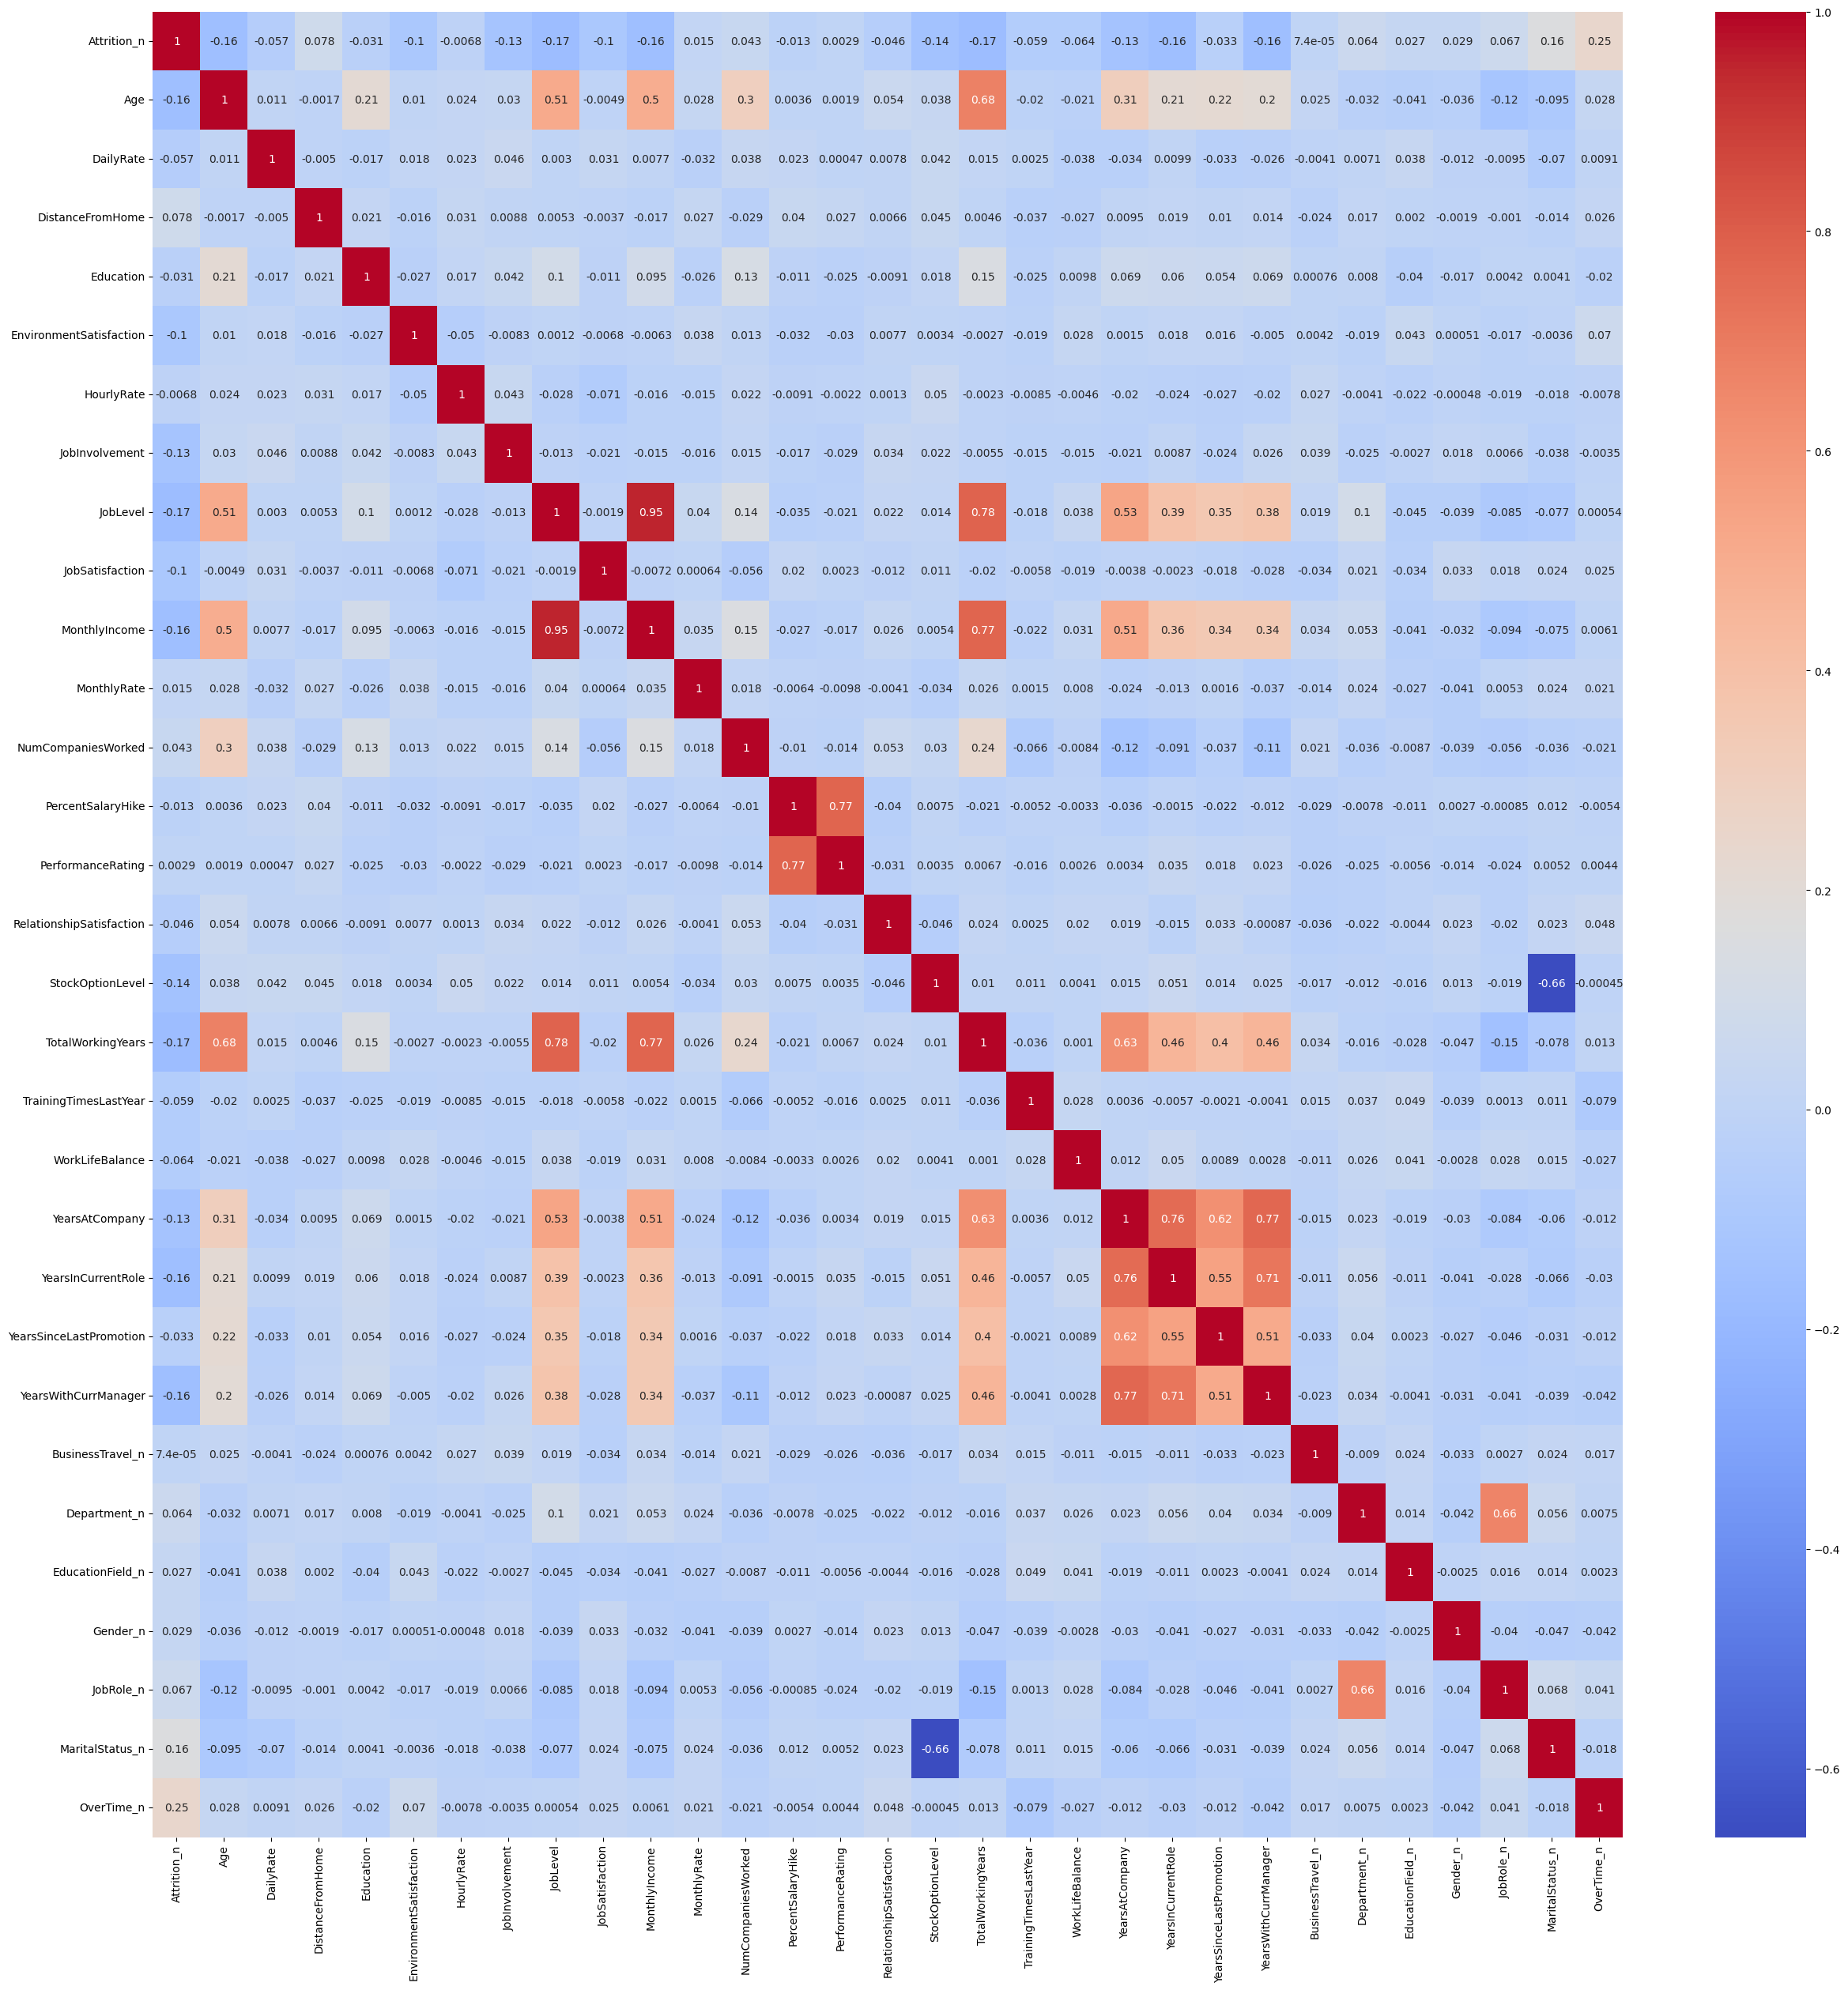

In [18]:
#EDA: Correlation Heatmap. Checking for Multicollinearity and Low Correlations.

#Insert Attrition as first column for easy visualisation in the heatmap
first_column = Input_n.pop('Attrition_n')
Input_n.insert(0, 'Attrition_n', first_column)

plt.figure(figsize=(30,30))
ab.heatmap(Input_n.corr(), annot=True, cmap="coolwarm")

In [19]:
#Based on above, we will drop below predictors as they have low correlation with
#Attrition and hence are not likely to help predict if an employee will leave:
## Daily Rate, DistanceFromHome,Education, HourlyRate, Monthly Rate,
## NumComapaniesWorked, Percent Salary Hike, Performance Rating,
## Relationship Satisfaction, Training Times last year, Work Life Balance
## Years Since Last Promotion, Business Travel, Department, Education Field
## Gender, JobRole

Input_n.drop(['DailyRate', 'DistanceFromHome','Education', 'HourlyRate',
              'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating','RelationshipSatisfaction','TrainingTimesLastYear',
            'WorkLifeBalance', 'YearsSinceLastPromotion', 'BusinessTravel_n',
            'Department_n', 'EducationField_n','Gender_n', 'JobRole_n'],
             axis="columns", inplace=True)

In [20]:
Input_n.head()

,Attrition_n,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,MaritalStatus_n,OverTime_n
0,1,41,2,3,2,4,5993,0,8,6,4,5,2,1
1,0,49,3,2,2,2,5130,1,10,10,7,7,1,0
2,1,37,4,2,1,3,2090,0,7,0,0,0,2,1
3,0,33,4,3,1,3,2909,0,8,8,7,0,1,1
4,0,27,1,3,1,2,3468,1,6,2,2,2,1,0


In [21]:
#We also observe following multicollinearity in above heat-map
## Job level and Total Working years: 0.78
## Monthly Income and Total Working years: 0.77
## Job Level and Monthly Income: 0.95
## Total Working Years and Age: 0.68
## So, we will drop Total Working years and Monthly Income as they are represented
## by other predictors

Input_n.drop(['TotalWorkingYears', 'MonthlyIncome'], axis="columns",
             inplace=True)

In [22]:
Input_n.dtypes
#No of predictors significantly optimised

Attrition_n                int64
Age                        int64
EnvironmentSatisfaction    int64
JobInvolvement             int64
JobLevel                   int64
JobSatisfaction            int64
StockOptionLevel           int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsWithCurrManager       int64
MaritalStatus_n            int64
OverTime_n                 int64
dtype: object

In [23]:
#Detecting and handling missing values in the numerical/continuous predictors
Input_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Attrition_n              1470 non-null   int64
 1   Age                      1470 non-null   int64
 2   EnvironmentSatisfaction  1470 non-null   int64
 3   JobInvolvement           1470 non-null   int64
 4   JobLevel                 1470 non-null   int64
 5   JobSatisfaction          1470 non-null   int64
 6   StockOptionLevel         1470 non-null   int64
 7   YearsAtCompany           1470 non-null   int64
 8   YearsInCurrentRole       1470 non-null   int64
 9   YearsWithCurrManager     1470 non-null   int64
 10  MaritalStatus_n          1470 non-null   int64
 11  OverTime_n               1470 non-null   int64
dtypes: int64(12)
memory usage: 137.9 KB


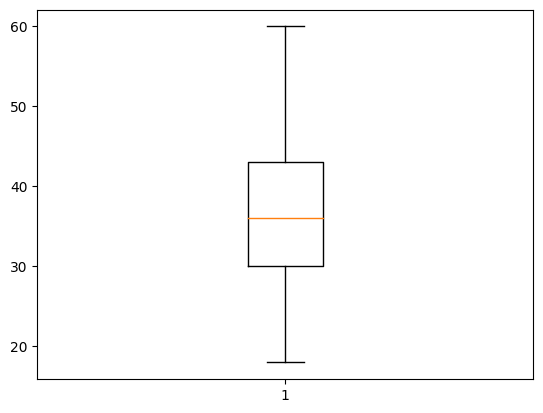

<Figure size 1000x700 with 0 Axes>

In [24]:
#There are no null values in the dataset we will use.
#Also, since we do not have any predictor which are on a significantly different
#scale (unit for all continuous variables is Years in above data set).
#So, we are not performing Centering and Scaling of the remaining Predictors for
#  Prediction using Logistic Regression.
#Now we will check for outliers in the continuous variables in the latest dateset.

plt.boxplot(Input_n.Age)
fig = plt.figure(figsize =(10, 7))
plt.show()

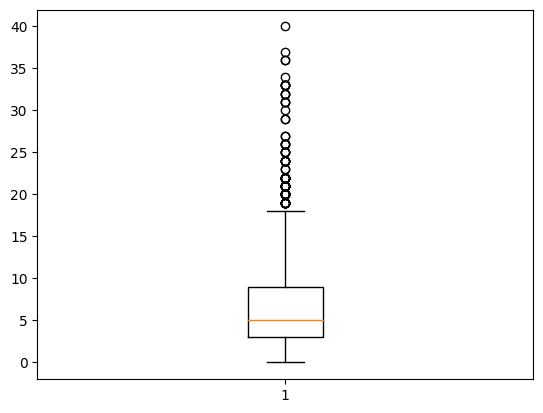

<Figure size 1000x700 with 0 Axes>

In [25]:
plt.boxplot(Input_n.YearsAtCompany)
fig = plt.figure(figsize =(10, 7))
plt.show()

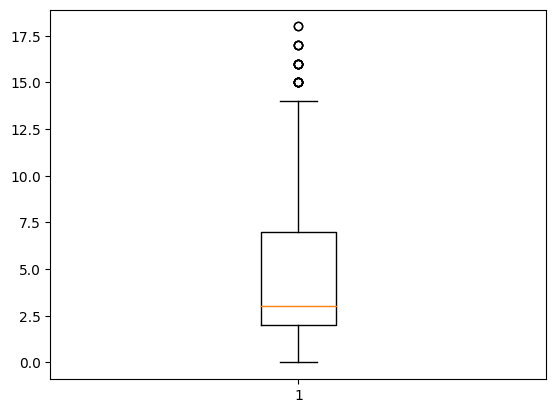

<Figure size 1000x700 with 0 Axes>

In [26]:
plt.boxplot(Input_n.YearsInCurrentRole)
fig = plt.figure(figsize =(10, 7))
plt.show()

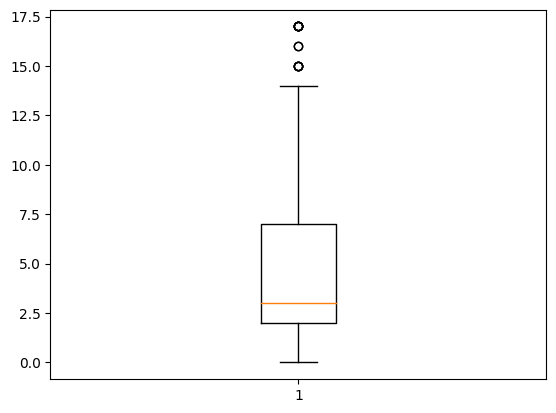

<Figure size 1000x700 with 0 Axes>

In [27]:
plt.boxplot(Input_n.YearsWithCurrManager)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [28]:
#There are no outliers with regards to Age. This is not a surprise as all
#employees
# work post college and till retirement.
#There are few outliers for YearsAtCompany,YearsInCurrentRole,
# YearsWithCurrManager
#However, as per our domain knowledge of HR area, these may be important
# indicators for employee retention. So, we will retain these outliers.

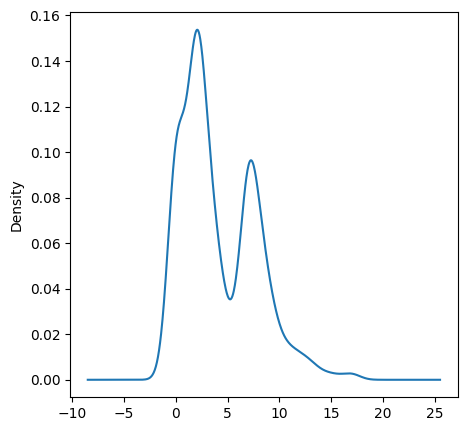

In [29]:
#Next, we will check for Skewness for Age, YearsAtCompany, YearsInCurrentRole, and
# YearsWithCurrManager.

plt.figure(figsize =(5, 5))
Input_n['YearsWithCurrManager'].plot(kind='density')
plt.show()

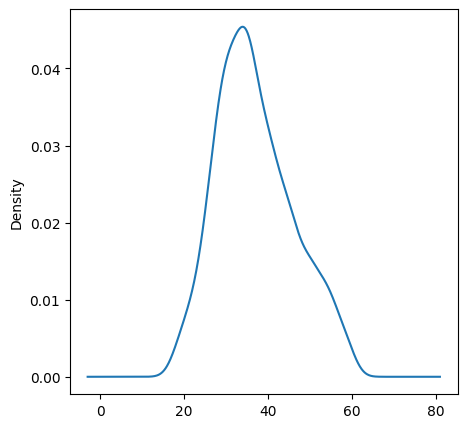

In [30]:
plt.figure(figsize =(5, 5))
Input_n['Age'].plot(kind='density')
plt.show()

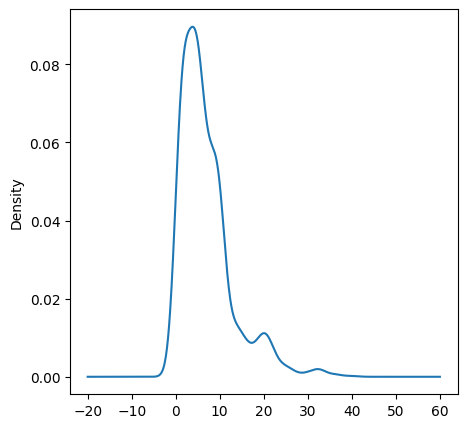

In [31]:
plt.figure(figsize =(5, 5))
Input_n['YearsAtCompany'].plot(kind='density')
plt.show()

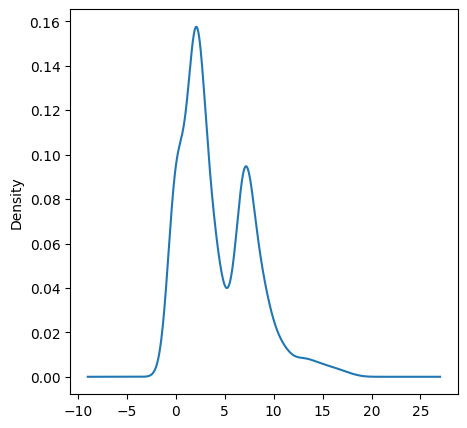

In [32]:
plt.figure(figsize =(5, 5))
Input_n['YearsInCurrentRole'].plot(kind='density')
plt.show()

In [33]:
Input_n.YearsAtCompany.skew()

1.7645294543422085

In [34]:
Input_n.YearsInCurrentRole.skew()

0.9173631562908262

In [35]:
Input_n.YearsWithCurrManager.skew()

0.8334509919918475

In [36]:
Input_n.Age.skew()

0.4132863018563338

In [37]:
#As Skewness ranges between -2 and +2 in all of above, we conclude that
# current level of skewness in above predictors is acceptable.
#Now we will proceed with Building a Simple Prediction Model using
#Logistic Regression.

In [38]:
#######################  Logistic Regression ###################

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable. X_LR = Inputs, Y_LR = Target
Y_LR = Input_n.Attrition_n
X_LR = Input_n
X_LR.drop(['Attrition_n'], axis="columns", inplace=True)


In [39]:
X_LR.dtypes

Age                        int64
EnvironmentSatisfaction    int64
JobInvolvement             int64
JobLevel                   int64
JobSatisfaction            int64
StockOptionLevel           int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsWithCurrManager       int64
MaritalStatus_n            int64
OverTime_n                 int64
dtype: object

In [40]:
# Split data into training and testing sets
X_LR_train, X_LR_test, Y_LR_train, Y_LR_test = train_test_split(X_LR, Y_LR,
                                                test_size=0.2, random_state=42)

In [41]:
# Create logistic regression model
Model_LR = LogisticRegression()

In [42]:
# Train the model
Model_LR.fit(X_LR_train, Y_LR_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# Make predictions
Y_LR_pred = Model_LR.predict(X_LR_test)

In [44]:
#Evaluate Model Performance

# Calculate accuracy
accuracy = accuracy_score(Y_LR_test, Y_LR_pred)
print('Accuracy:', accuracy)


# Classification report
print('Classification Report:')
print(classification_report(Y_LR_test, Y_LR_pred))

Accuracy: 0.8741496598639455
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.23      0.33        39

    accuracy                           0.87       294
   macro avg       0.73      0.60      0.63       294
weighted avg       0.85      0.87      0.85       294



In [45]:
#Baseline - Key Performance metrics:
#   Accuracy - 87.4%
#   Precision - 56% for positive class (Attrition = Yes)
#   Recall = 23% for positive class (Attrition = Yes)

In [46]:
#Predicting the output of the first 10 elements of the test set
print(Model_LR.predict(X_LR_test[0:10]))

[0 0 0 0 0 0 0 0 0 0]


In [47]:
#Comparing with first 10 elements of Target set
print(Y_LR_test[0:10])

1041    0
184     0
1222    1
67      0
220     0
494     0
430     0
240     0
218     0
49      0
Name: Attrition_n, dtype: int64


In [48]:
#All except one was predicted correctly.
#Fore reference, key predictors below to these 10 data instances.
X_LR_test.head(10)

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,MaritalStatus_n,OverTime_n
1041,28,4,3,2,1,0,5,4,3,2,0
184,53,4,4,2,1,2,4,2,3,0,0
1222,24,4,1,1,3,1,1,0,0,1,0
67,45,2,3,3,1,1,1,0,0,0,0
220,36,4,3,2,2,0,13,11,7,2,0
494,34,3,3,1,3,2,8,2,6,0,1
430,35,4,1,1,3,0,5,4,3,2,0
240,39,3,3,1,3,3,3,2,2,0,0
218,45,4,2,3,4,0,19,7,8,2,0
49,35,4,4,1,4,0,1,0,1,1,0


In [57]:
#We will now build model using KNN

# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(Input_n, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()





,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,MaritalStatus_n,OverTime_n
0,0.446350,-0.660531,0.379672,-0.057788,1.153254,-0.932014,-0.164613,-0.063296,0.245834,1.236820,1.591746
1,1.322365,0.254625,-1.026167,-0.057788,-0.660853,0.241988,0.488508,0.764998,0.806541,-0.133282,-0.628241
2,0.008343,1.169781,-1.026167,-0.961486,0.246200,-0.932014,-1.144294,-1.167687,-1.155935,1.236820,1.591746
3,-0.429664,1.169781,0.379672,-0.961486,0.246200,-0.932014,0.161947,0.764998,-1.155935,-0.133282,1.591746
4,-1.086676,-1.575686,0.379672,-0.961486,-0.660853,0.241988,-0.817734,-0.615492,-0.595227,-0.133282,-0.628241


In [77]:
## Creating Model using KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features and target variable
X = X_LR
y = Y_LR
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Create and train the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8809523809523809
Confusion Matrix:
 [[251   4]
 [ 31   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.67      0.21      0.31        39

    accuracy                           0.88       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.86      0.88      0.85       294



In [64]:
# Define a function to evaluate KNN with different values of k
def evaluate_knn(k_values):
    results = {}
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, output_dict=True)
        results[k] = {
            'accuracy': accuracy,
            'confusion_matrix': conf_matrix,
            'classification_report': class_report
        }
    return results

# Evaluate KNN with different values of k
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
knn_results = evaluate_knn(k_values)

# Extract accuracies for different k values
knn_accuracies = {k: result['accuracy'] for k, result in knn_results.items()}
knn_accuracies

{1: 0.7925170068027211,
 3: 0.8639455782312925,
 5: 0.8673469387755102,
 7: 0.8639455782312925,
 9: 0.8741496598639455,
 11: 0.8707482993197279,
 13: 0.8775510204081632,
 15: 0.8809523809523809}

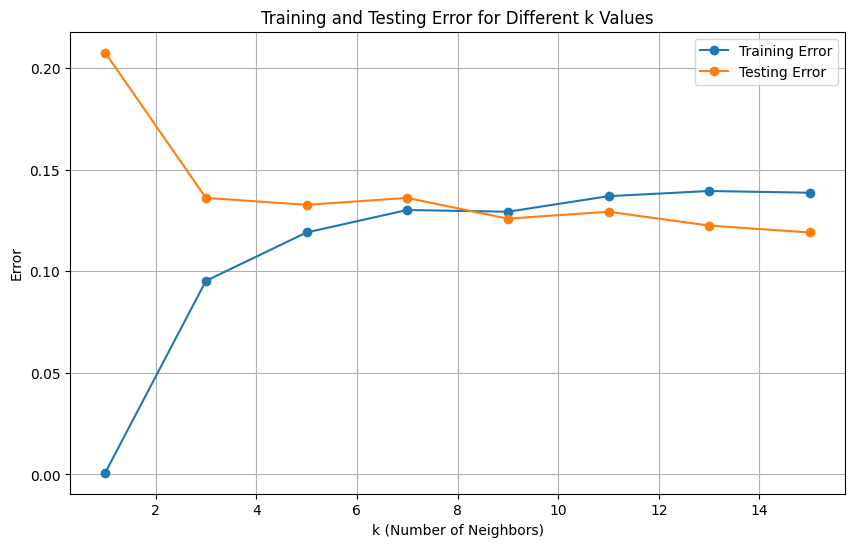

In [65]:
import numpy as np

# Function to compute training and testing error for different k values
def compute_errors(k_values, X_train, y_train, X_test, y_test):
    train_errors = []
    test_errors = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Compute training error
        y_train_pred = knn.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        train_errors.append(train_error)

        # Compute testing error
        y_test_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)

    return train_errors, test_errors

# Compute training and testing errors for different k values
train_errors, test_errors = compute_errors(k_values, X_train, y_train, X_test,
                                           y_test)

# Plot the training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o')
plt.plot(k_values, test_errors, label='Testing Error', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.title('Training and Testing Error for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# Train the KNN classifier with k=15
knn_optimal = KNeighborsClassifier(n_neighbors=15)
knn_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_optimal = knn_optimal.predict(X_test)

# Display the first few predictions alongside the actual values
predictions_df = pd.DataFrame({'Actual': y_test,
                               'Predicted': y_test_pred_optimal})
predictions_df.head()

,Actual,Predicted
1041,0,0
184,0,0
1222,1,0
67,0,0
220,0,0


In [67]:
# Combine the actual and predicted values with the corresponding feature data for the test set
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_optimal})
combined_df = X_test_df.copy()
combined_df['Actual'] = y_test
combined_df['Predicted'] = y_test_pred_optimal

# Display the first few rows with complete data
combined_df.head()

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,MaritalStatus_n,OverTime_n,Actual,Predicted
1041,-0.977174,1.169781,0.379672,-0.057788,-1.567907,-0.932014,-0.327893,-0.063296,-0.314873,1.236820,-0.628241,0,0
184,1.760373,1.169781,1.785511,-0.057788,-1.567907,1.415991,-0.491174,-0.615492,-0.314873,-1.503385,-0.628241,0,0
1222,-1.415181,1.169781,-2.432006,-0.961486,0.246200,0.241988,-0.981014,-1.167687,-1.155935,-0.133282,-0.628241,1,0
67,0.884358,-0.660531,0.379672,0.845911,-1.567907,0.241988,-0.981014,-1.167687,-1.155935,-1.503385,-0.628241,0,0
220,-0.101159,1.169781,0.379672,-0.057788,-0.660853,-0.932014,0.978348,1.869389,0.806541,1.236820,-0.628241,0,0


In [ ]:
## Comparing Key Performance metrics with Baseline from Logistic Regression:
#   Accuracy - 88% (for k=15)
#   Precision - 67% for positive class (Attrition = Yes)
#   Recall = 21% for positive class (Attrition = Yes)
# We have seen improvement in the performance metrics as compared to Baseline

## Creating another model using Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.8435374149659864
Confusion Matrix:
 [[241  14]
 [ 32   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.33      0.18      0.23        39

    accuracy                           0.84       294
   macro avg       0.61      0.56      0.57       294
weighted avg       0.81      0.84      0.82       294



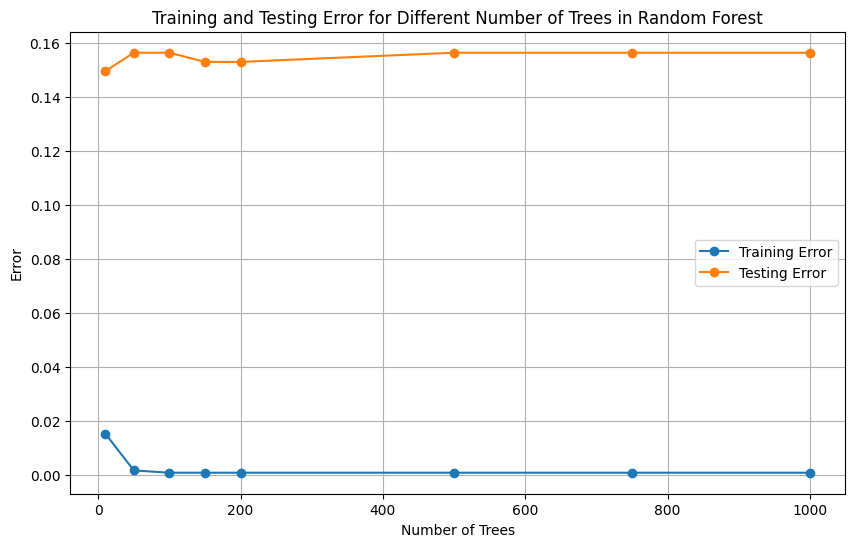

In [74]:
# Function to compute training and testing error for different number of trees
#in Random Forest
def compute_rf_errors(n_trees, X_train, y_train, X_test, y_test):
    train_errors = []
    test_errors = []

    for n in n_trees:
        rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
        rf_classifier.fit(X_train, y_train)

        # Compute training error
        y_train_pred = rf_classifier.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        train_errors.append(train_error)

        # Compute testing error
        y_test_pred = rf_classifier.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)

    return train_errors, test_errors

# Define a range of number of trees to evaluate
n_trees = [10, 50, 100, 150, 200, 500, 750, 1000]

# Compute training and testing errors for different number of trees
train_errors_rf, test_errors_rf = compute_rf_errors(n_trees, X_train,
                                                    y_train, X_test, y_test)

# Plot the training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(n_trees, train_errors_rf, label='Training Error', marker='o')
plt.plot(n_trees, test_errors_rf, label='Testing Error', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Training and Testing Error for Different Number of Trees in Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Train the Random Forest classifier with 100 trees
rf_classifier_optimal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_rf_optimal = rf_classifier_optimal.predict(X_test)

# Display the first few predictions alongside the actual values
predictions_rf_df = pd.DataFrame({'Actual': y_test,
                                  'Predicted': y_test_pred_rf_optimal})
predictions_rf_df.head()

,Actual,Predicted
1041,0,0
184,0,0
1222,1,0
67,0,0
220,0,0


In [ ]:
## Comparing Key Performance metrics with Baseline from Logistic Regression:
#   Accuracy - 84.3% (for number of trees in forest = 100)
#   Precision - 33% for positive class (Attrition = Yes)
#   Recall = 18% for positive class (Attrition = Yes)


# Final Observations (Comparing all three models - Logistic Regression, KNN
# and Random Forest Classifier)

# As mentioned above,
#     KNN is the best performing model with
#     accuracy of 88% (for k=15)
#     Precision - 67% for positive class (Attrition = Yes) and
#     Recall = 21% for positive class (Attrition = Yes)

# Hence, we conclude that KNN may be the preferable predictive model
# for novel data for Employee Attrition.
